# Assignment in intro to data neural computation

### By : Michael trushkin , 323363838

## About the data

All data Is two dimensional ,  <x,y>   where    -1 <= x, y <= 1.  <br>
The data is all data points <x, y> where x is of the form m/100 where m is an integer between -100 and +100  <br>
and y is of the form  n/100 with n an integer between -100 and +100.  

Suppose that all data points with x > 1/2 and y >1/2  have the value 1; all other points have the value -1.

Now  suppose you do not know this; but you are given a random sample of data of size 1000 together with its value <br>
( e.g. the point  <60/100,  80/100> has value 1; while the point  <20/100, 70/100> has the value -1.)


## Part A.    
* Implement the Adaline learning algorithm and show how it generalizes to develop a decision that works on all the set.  

#### Does the accuracy of the result depend on the training set?  
* Present tables and possibly a picture indicating your results.
 
#### Suppose the data is of the size n/10,000 with n an integer between -10,000 and +10,000.    
* How does this affect your choice of training data and testing data?


### Import & Create the data

In [156]:
import numpy as np
import matplotlib.pyplot as plt

def f(x,y):
    if x > 0.5 and y > 0.5:
        return 1
    return -1

def create_data(_f, _size, _maxn, _maxm):
    fdata = []
    for i in range(_size):
        n = (int)(np.random.random() * 2 * _maxn) - _maxn;
        m = (int)(np.random.random() * 2 * _maxm) - _maxm;

        x = m / _maxm;
        y =  n / _maxn;   
        fdata.append([x, y, _f(x,y)])
    fdata = np.array(fdata)
    return fdata

def create_test_data(_f, _maxn, _maxm):
    fdata = []
    for i in range(-_maxm,_maxm):
        x = i / _maxm
        for j in range(-_maxn,_maxn):
            y = j / _maxn
            fdata.append([x, y, _f(x,y)])
    fdata = np.array(fdata)
    return fdata



data = []
size = 1000

maxn = 100
maxm = 100

data = create_data(f, size, maxn, maxm)



test_data = create_test_data(f, maxn, maxm)

### Show training data of size 1k
* Yellow dots represent 1's and negative represent 0's.

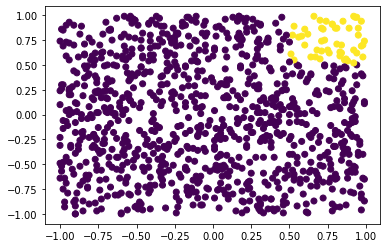

In [32]:
data[:,:-1]
#plt.scatter(data[:,: 0], y, c=y, s=500)
plt.scatter(data[:,:1], data[:,1:2], c=data[:,2:3])

## Train the neuron on 1k, 10 epoch

In [33]:
import random
import neuron
import importlib
from neuron import Neuron
importlib.reload(neuron)
n = Neuron(2, 1, 0.1)
n.version()

'ver 1.1'

In [34]:
# train_err = 0
# for sample in data:
#     train_err += n.adelaine_train(sample[:-1], sample[-1:])
errs = []
#train_err = n.train_all(data[:,:-1], data[:,-1:])
for i in range(5):
    errs.append(int(n.train_all(data[:,:-1], data[:,-1:]).sum()))
print("train err :\n", errs)

train err :
 [190, 187, 187, 187, 187]


In [35]:
def predict_result(n, X):
    predicted = []
    for sample in X:
        predicted.append(n.predict(sample))
    predicted = np.array(predicted)
    return predicted

In [36]:
predicted = predict_result(n, data[:,:-1])

diff :np.array = abs(data[:,2:3].flatten() - predicted)
from cycler import cycler
from matplotlib.pyplot import figure
from matplotlib import cm

#plt.style.use('default')

### Given trained neuron calculate the linear seperation line

In [37]:
def ftx(_n : Neuron, x):
    v = ((_n.weights[0] * -x) - _n.bias) / _n.weights[1]
    return v.sum()

def calc_line(_n):
    _lx = np.arange(-1, 1.1, 0.1) 
    _ly = []
    for i in _lx:
        _ly.append(ftx(_n, i))
    return _lx, _ly

### In the figure below we can see in Gray all the inputs the neuron has classified wrongly
after training on 1000 inputs, for 5 times.

and the dotted line represent the seperation the neuron has concluded.

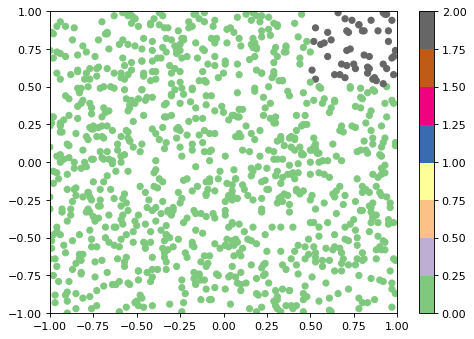

In [38]:
figure(figsize=(7, 5), dpi=80)

lx, ly = calc_line(n)

plt.scatter(data[:,:1], data[:,1:2], c=diff,s = 30, cmap='Accent')
lines = plt.plot(lx, ly, '--')
plt.setp(lines, color='black', linewidth=5.0)

plt.ylim(-1, 1)
plt.xlim(-1, 1)

plt.colorbar()

### we get an accuracity of 95% on the training set!
this is not the Test data!

in this example we can't even see the "line" the neuron has predicted,

In [39]:
acc_t1000 = 1 - (diff.sum() / (2 * diff.shape[0]))
print("Accuracity :", acc_t1000 )
print(diff.sum() / 2)

Accuracity : 0.95
50.0


### define function's for latter use

#### define calculate accuracity

In [40]:
def calculate_accuracity(prediction_data):
    _acc = 1 - (prediction_data[2].sum() / (2 * prediction_data[2].shape[0]))
    return _acc

#### Given test results plot it

In [119]:
def plot_test(test_results, title, ax = None, res = 1):
    if ax is None:
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 5))
    #figure(figsize=(7, 5), dpi=80)


    plt.subplot(ax)

    wrong = test_results[2][::res] > 1
    right = test_results[2][::res] < 1

    wr = plt.scatter(test_results[0][::res][:,:1][wrong], test_results[0][::res][:,1:][wrong], c='r',s = 20, alpha = 0.8, cmap='Accent')
    rp = plt.scatter(test_results[0][::res][:,:1][right], test_results[0][::res][:,1:][right], c='g',s = 20, alpha = 0.8, cmap='Accent')

    ax.title.set_text(title)
    plt.legend((wr, rp), ("Wrong classification", "Right classification"),loc='lower left')

    _lx, _ly = calc_line(test_results[3])
    
    lines = plt.plot(_lx, _ly, '--')
    plt.setp(lines, color='black', linewidth=5.0)

    plt.ylim(-1, 1)
    plt.xlim(-1, 1)
    return ax

#### calculate the error of the neuron on a given data

In [42]:
def run_just_test(_n, test_data):
    pos = test_data[:,:-1]
    pvalue = test_data[:,-1:]

    _predicted = predict_result(_n, pos)
    _diff :np.array = abs(pvalue.flatten() - _predicted)
    return [pos, pvalue, _diff, _n]


#### train and calculate error

In [56]:
def run_test(_f, _size, _maxn, _maxm, data_func, test_data = None, epochs = 1):
    pdata = data_func(_f, _size, _maxn, _maxm)
    _n = Neuron(2, 1, 0.1)
    pos = pdata[:,:-1]

    pvalue = pdata[:,-1:]

    for i in range(epochs):
        _n.train_all(pos, pvalue)

    if(test_data is None):
        test_data = pdata  
    # _predicted = predict_result(n, pos)
    # _diff :np.array = abs(pvalue.flatten() - _predicted)
    return run_just_test(_n, test_data)


## Answering Question A

#### Does the accuracy of the result depend on the training set?  
* Present tables and possibly a picture indicating your results.


### what we will do
* we will run our neuron on a few different data-sets of different sizes
* we will then see if there is a difference

### what we belive would happen
* i think that yes data-size and the quallity of the test would yield different results.

## Some observations

### Note if we always predict -1, we would predict all dots where x>0.5 and y>0.5 wrongly Would have 93.5% accuracity
* if we calculate the area of this tiny box, with is 0.5 \* 0.5 and devide by the whole space with is 2 \* 2
* we will conclude that the area of the positive values is about 0.0625,
* meaning a program like that would have an accuracity rating of 0.935

## Bad Data 1
### Create a badly distributed dataset
* data will be centered around the 0,0 and will contain small amount of "good" examples.

In [83]:
def create_bad_Data(_f, _size, _maxn, _maxm):
    fdata = []
    for i in range(_size):
        n = (int)(np.random.random() * 2 * _maxn) - _maxn;
        m = (int)(np.random.random() * 2 * _maxm) - _maxm;
        n *= 0.75 + np.random.random() * 0.25
        m *= 0.75 + np.random.random() * 0.25
        x = m / _maxm;
        y =  n / _maxn;   
        fdata.append([x, y, _f(x,y)])
    fdata = np.array(fdata)
    return fdata

### we can see that the neuron fails to get a good answer on uneven data-set
most of the time it fails to find any seperation at all<br>

and we only "slightly" reduced the probability of points being beyond 0.75 on x and y

[[0.34881197]
 [0.38860209]] [[-0.56450519]]


<AxesSubplot:title={'center':'non uniform test'}>

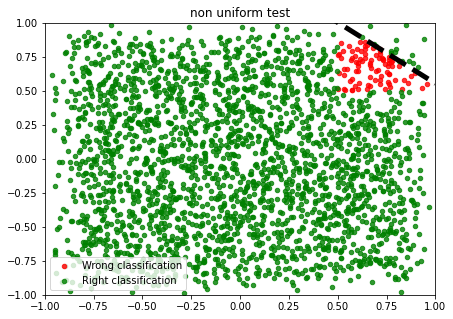

In [135]:
ttest = run_test(f, 2500, maxn, maxm, create_bad_Data, epochs=3)
print(ttest[3].weights, ttest[3].bias)
plot_test(ttest, "non uniform test")

In [73]:
def run_multiple_tests(tests, f, size, data_func, test_data, epochs = 1):
    best = None
    best_score = -1000
    _acc = 0
    for i in range(tests):
        results = run_test(f, size, maxn, maxm, data_func, test_data, epochs)
        cacc = calculate_accuracity(results)
        if(cacc > best_score):
            best = results
            best_score = cacc
        _acc += cacc
    return best, _acc / tests, best_score

## Run tests on different data sets

In [98]:
sizes = []
acc = []
best_acc = []
test_name = []

test_results = []

tests = 10

for _size in [50, 500, 1000, 5000, 10000]:
    # do uniform data sets test, with different train set size
    test_name.append("uniform")
    sizes.append(_size)

    best , avg_acc, best_score = run_multiple_tests(tests, f, size, create_data, test_data)

    best_acc.append(best_score)
    acc.append(avg_acc)
    test_results.append(best)

    # do 0,0 centered data train and write results

    test_name.append("non-uniform")
    sizes.append(_size)
    best , avg_acc, best_score = run_multiple_tests(tests, f, size, create_bad_Data, test_data, 3)

    best_acc.append(best_score)
    acc.append(avg_acc)
    test_results.append(best)

## We show below a table of all the scores per Training size, and type

In [100]:
import pandas as pd

df_data = {'Test type':test_name ,'Test size': sizes, 'avg accuracity': acc, 'best accuracity' : best_acc }
df = pd.DataFrame(data=df_data)
df

Test type  Test size  avg accuracity  best accuracity
0      uniform         50        0.938265         0.939975
1  non-uniform         50        0.933010         0.979100
2      uniform        500        0.940895         0.949175
3  non-uniform        500        0.941663         0.979775
4      uniform       1000        0.940120         0.941425
5  non-uniform       1000        0.935058         0.967800
6      uniform       5000        0.952515         0.979925
7  non-uniform       5000        0.939975         0.939975
8      uniform      10000        0.943880         0.978700
9  non-uniform      10000        0.942280         0.962200

## Plot the results per neuron
* red represent miss-matchs
* green represent rightfully classified
* black line, is the neuron predicted linear seperation

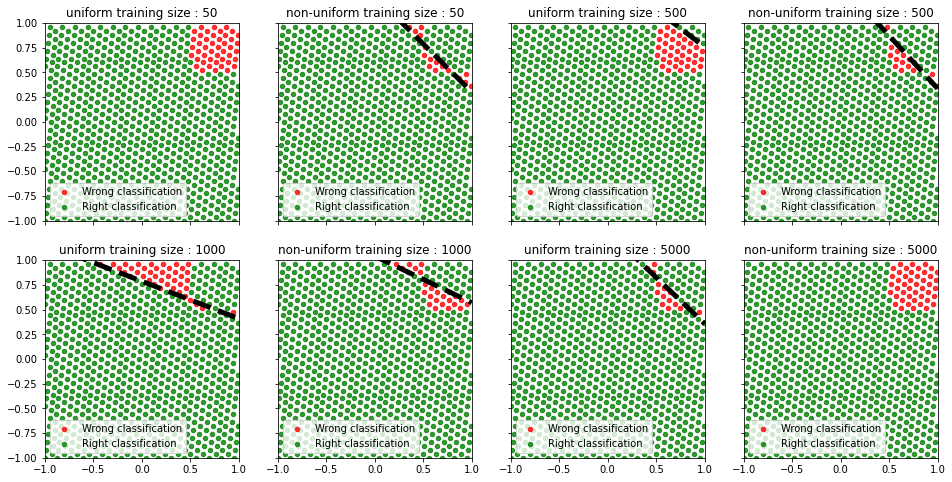

In [148]:
i = 1
fig, axs = plt.subplots(nrows=2, ncols=4, sharex=True, sharey=True, figsize=(16,8))
# plot_test(axs[0][0], test_results[0])
for i in range(8):
    j = i % 4
    k = int(i / 4)
    name = test_name[i] + " training size : " + str(sizes[i])
    plot_test(test_results[i], name, axs[k][j], res = 53)
plt.show()


## About the plots
* we have trained multiple times different neurons on different data-sets
* then we computed the error on each trained neuron using the "full" data-set with no duplicates.
* we also plotted the result on that full data-set


## Conclution of Question A
### We can see that train-data has an effect on the results, as uniformly distributed data gives better resuls,
* we can also see that the "quantity" of data is very important and of couse the quantity of "right" and "wrong" data.

## Question A.b

#### Suppose the data is of the size n/10,000 with n an integer between -10,000 and +10,000. 
* How does this affect your choice of training data and testing data?

### Answer
* it doesnt effect my training data, the percision of the floating point wont have any major effect.
* more over we can train the neuron on data with -100 < n < 100 and then use it with the data of -10000 < n < 10000
* and would get the same results

## demonstation of old trained neuron on -10000 < n < 10000

Accuracity :  0.9696


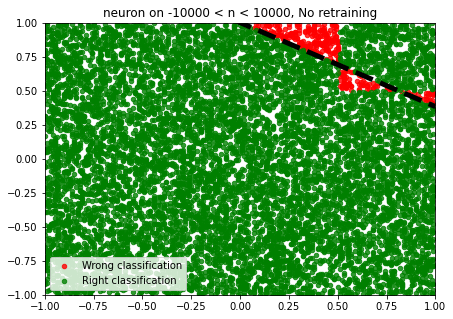

In [55]:
data_n10000 = create_data(f, 10000, 10000, maxm)
trained_neuron = test_results[12][3]
# print(trained_neuron)
pred_res = run_just_test(trained_neuron, data_n10000)
plot_test(pred_res, "neuron on -10000 < n < 10000, No retraining")
print("Accuracity : " , calculate_accuracity(pred_res))


#### We can clearly observe that changing n to be from -10k to 10k doesnt have any effect
* it would just slightly change the accuracity, but not really change the final "weights"

# Question B
#### Now change the problem so that points such that <x.y> has value 1 only if 1/2  <= x^2 + y^2 <= 3/4
* What are the best results you obtain using an Adaline?  <br>
 Does the quality of the results change if you use more data?  <br>
 Present tables and perhaps a figure.

## My prediction
 * I predict that Adaline neuron would not yield a good result, as the function not linear at all
 * the given data is an outer shell of a circle and thuse not linearly seperable
 * Heck even the previous funcion was not linearly seperable as its a rectengle and not a single straigh line.
 #### Note : we will simply use the functions we defined above

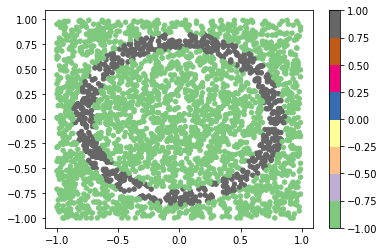

In [162]:
def new_f(x, y):
    d = x**2 + y**2
    if 0.5 <= d <= 0.75:
        return 1
    return -1

q2_data_1k = create_data(new_f, 3250, maxn, maxm)
q2_data_10k =  create_test_data(new_f, maxn, maxm)

plt.scatter(q2_data_1k[:,:1], q2_data_1k[:,1:2], c=q2_data_1k[:,-1:],s = 20, cmap='Accent')
plt.colorbar()

### we can see in the figure above that the data with 1's is a circle, hence no linear seperability

## train few adaline neurons and see result

In [166]:
sizes_q2 = []
acc_q2 = []
test_name_q2 = []

test_results_q2 = []
best_scores = []

tests_q2 = 10

for _size in [50, 500, 1000, 2500, 5000, 10000]:
    # do uniform data sets test, with different train set size
    test_name_q2.append("uniform")
    sizes_q2.append(_size)
    best = None
    best_score = -1000
    _acc = 0
    for i in range(tests_q2):
        results = run_test(new_f, size, maxn, maxm, create_data, q2_data_10k)
        cacc = calculate_accuracity(results)
        if(cacc > best_score):
            best = results
            best_score = cacc
        _acc += cacc
    acc_q2.append(_acc / tests)
    best_scores.append(best_score)
    test_results_q2.append(best)

In [167]:
df_data = {'Test type':test_name_q2 ,'Test size': sizes_q2, 'avg accuracity': acc_q2, 'best accuracity' : best_scores}
df = pd.DataFrame(data=df_data)
df

Test type  Test size  avg accuracity  best accuracity
0   uniform         50        0.773792           0.8032
1   uniform        500        0.778398           0.8032
2   uniform       1000        0.799358           0.8032
3   uniform       2500        0.750975           0.8032
4   uniform       5000        0.773335           0.8032
5   uniform      10000        0.779248           0.8032

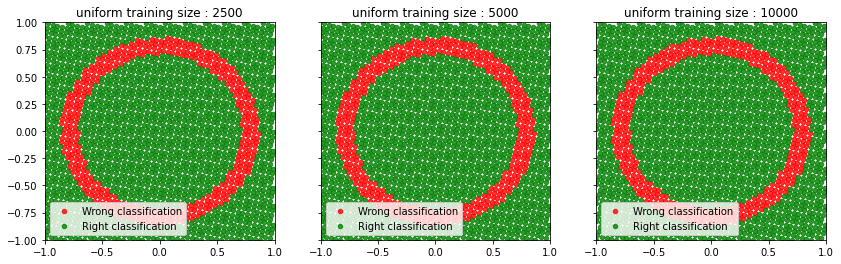

In [192]:
i = 1
fig, axs = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(14,4))
# plot_test(axs[0][0], test_results[0])
for i in range(3, 6):
    j = i % 3 
    k = int(i / 3) - 1
    name = test_name_q2[i] + " training size : " + str(sizes_q2[i])
    plot_test(test_results_q2[i], name, axs[j], res=17)
plt.show()

## Conclution
* we can see that out neuron classifies everything as negative.
* with of course would yield the smallest error.

### calculation of error in a dummy classifier
* we can subtract the area of the smaller circle from the bigger one.
* big circle radius is 0.75 thuse the area is 0.56pi
* small circle radius is 0.5 thuse the rea is 0.25pi <br>
 the area of the positive values is 0.31pi
 the space area is 4 units,
 the accuracity of dummy classifier is then 1 - 0.0775pi about 75%

### we can see that our classifiers yeild best accuracity of 80% with is about right,
   * note as the "space" is not really continues but has a resolution of 0.01 we get this 5% error

## Neuron Adaline Code
* Also in the files given

In [60]:
class Neuron_Duplicate:
    def __init__(self, num_inputs, num_outputs, rate=0.1):
        self.weights = np.zeros((num_inputs, num_outputs))
        self.bias = np.zeros((1, num_outputs))
        self.rate = rate

    def adelaine_train(self, x: np.ndarray, y):
        # pred = x @ self.weights
        pred = self.predict(x)
        err = (y - pred)**2
        x: np.ndarray = np.reshape(x, self.weights.shape)
        gradient = 2*(y - pred)
        # print(gradient)
        self.weights += self.rate * gradient * x
        self.bias += self.rate * gradient
        return err

    def train_all(self, x, y):
        train_err = 0
        for i in range(x.shape[0]):
            train_err += self.adelaine_train(x[i], y[i])
        return train_err

    def predict(self, x: np.ndarray):
        pred = x @ self.weights + self.bias
        if pred > 0:
            return 1
        return -1

# The End
### thanks for reading
#### Michael trushkin